<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов." data-toc-modified-id="Взвешивание-классов.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов.</a></span></li><li><span><a href="#Увеличение-выборки-с-положительными-целевыми-признаками" data-toc-modified-id="Увеличение-выборки-с-положительными-целевыми-признаками-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки с положительными целевыми признаками</a></span></li><li><span><a href="#Уменьшение-выборки-с-отрицательными-целевыми-признаками" data-toc-modified-id="Уменьшение-выборки-с-отрицательными-целевыми-признаками-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки с отрицательными целевыми признаками</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**  
Признаки  
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата  

Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Удалим колонку RowNumber - индекс строки в данных, так как она со смещением на 1 дублирует индексы датафрейма.

In [3]:
df = df.drop(['RowNumber'], axis=1)

Проверим датафрейм на наличие дубликатов.

In [4]:
df.duplicated().sum()

0

В исходном датафрейме имеюются колонки, которые удалим, так как они не несут существенную информацию для построения модели: "CustomerId" - уникальный идентификатор клиента, "Surname" - фамилия.

In [5]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0


В названиях колонок между словами нет разделителей, вместо этого все слова начинаются с заглавной буквы. Добавим нижнее подчеркивание в качестве разделителя и приведем названия колонок к нижнему регистру.  

Создадим список columns_name для новых названий колонок и заполним его используя цикл:  
- Для каждого названия колонки, если в названии одно слово (то есть одна заглавная буква), то добавим это название с нижним регистром в список columns_name. Во всех остальных случаях в текстовой строке после окончания слова (то есть после окончания строчных букв) вставим разделитель "_", при этом, чтобы в конце названия колонки не стоял разделитель число разделителей должно быть на 1 меньше количества слов (то есть заглавных букв). После  расстановки разделителей так же добавим эту строку с нижним регистром в список columns_name.

In [6]:
columns_name = []
for column in df.columns:
    if len([l for l in column if l.isupper()]) ==1:
        columns_name.append(column.lower())
    else:
        column = re.sub("[a-z]+", lambda word: word[0] + "_", column, count=(len([l for l in column if l.isupper()])-1))
        columns_name.append(column.lower())
        
df.columns = columns_name 
df.head(2)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0


Выведем информацию о пропусках и типах данных в таблице.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              9091 non-null float64
balance             10000 non-null float64
num_of_products     10000 non-null int64
has_cr_card         10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null float64
exited              10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [8]:
print(f"В колонке признака tenure - 'сколько лет человек является клиентом банка' {df['tenure'].isna().mean():.1%} пропусков.")

В колонке признака tenure - 'сколько лет человек является клиентом банка' 9.1% пропусков.


Изучим датафрейм с пропусками, для возможного обнаружения закономерностей.

In [9]:
df[df['tenure'].isna()]

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Как видно из датафрейма с пропусками, их появление не обясняется каким либо другим признаком. Достоверно заполнить пропуски не представляется возможным. Заполнение средним значением исказит выборку и повлияет на обучение модели. Поэтому удалим пропуски.

In [10]:
df = df.dropna()

Выведем статистическую информациях о данных в датафрейме. 

In [11]:
df.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Построим гистограммы распределения признаков датафрейма (в том числе целевого "exited").

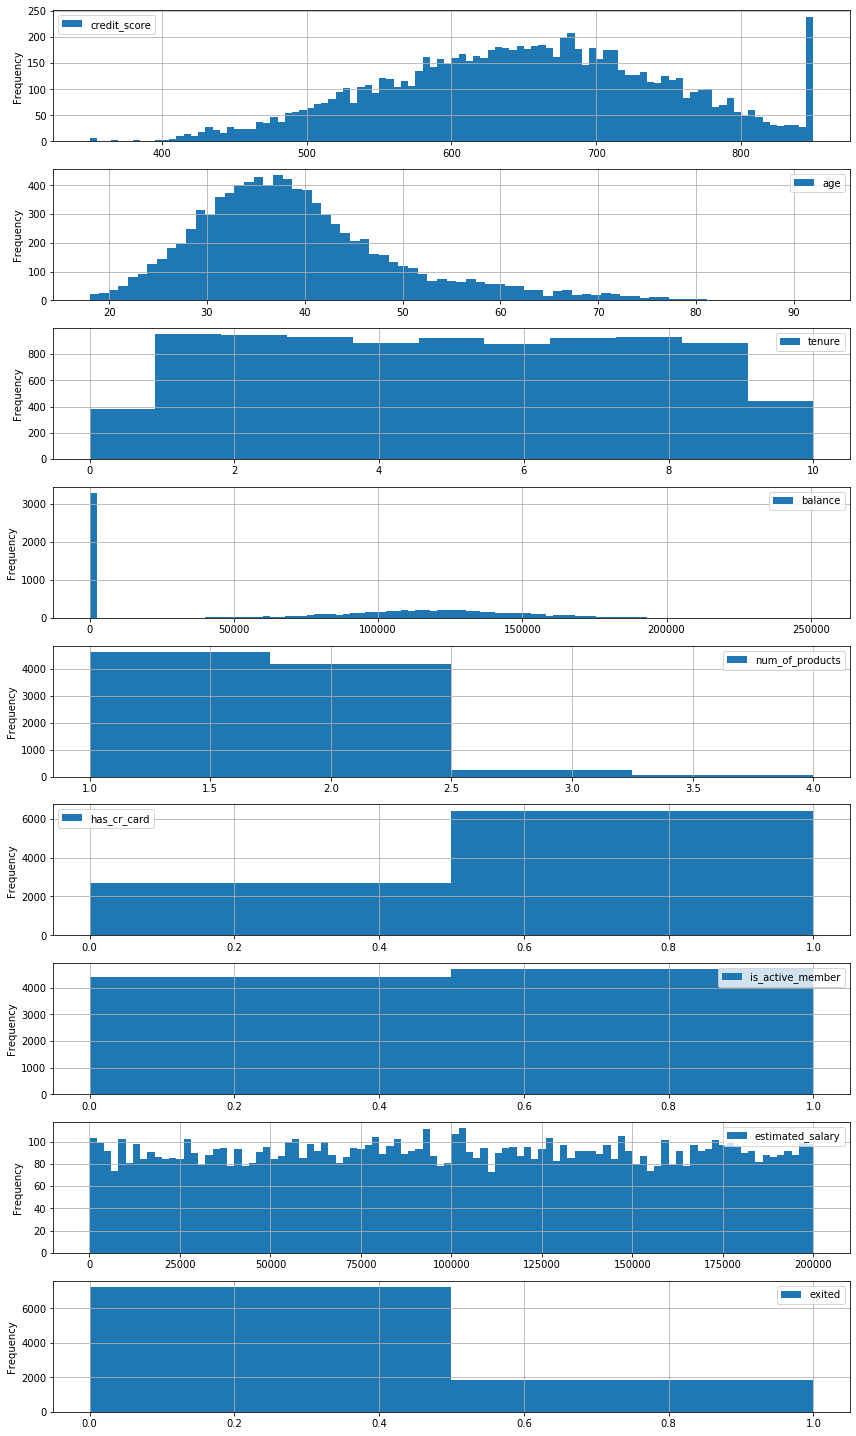

In [12]:
fig = plt.figure()
figsize=(15,20)
total_axes = len(df.describe().columns) 

subplt = 1 
for column in df.describe().columns:
    if int(df[column].max()-df[column].min()+1)>100:
        bins=100
    else:
        bins = int(df[column].max()-df[column].min()+1)
    ax = fig.add_subplot(total_axes, 1, subplt) 
    df[column].plot(kind='hist', bins=bins, figsize=(12,20), grid=True, legend=True)
    subplt+=1

plt.tight_layout()
plt.show()

Так же построим гистограммы для категориальных признаков заданных строковыми переменными.

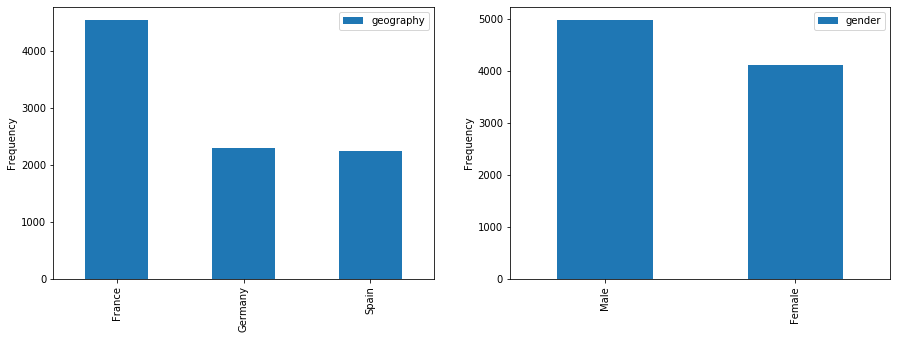

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2)
df['geography'].value_counts().plot(kind='bar', figsize=(15,5), ax=ax1, legend=True)
df['gender'].value_counts().plot(kind='bar', ax=ax2, legend=True)
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
plt.show()

### Вывод

- В датафрейме имеется 2 колонки с категориальными тектовыми признаками "geography", "gender". В дальнейшем преобразуем эти признаки в численные техникой One-Hot Encoding, методом pd.get_dummies().  
- Артефактов в признаках не обнаружено. Имеются выбивающиеся часто встречающиеся значения в колонках credit_score и balance. Для признака credit_score можно сказать, что имеется большое число клиентов с максимально возможным кредитным рейтингом. А для признака balance характерно большое число клинтов с нулевым балансом на счете.
- Пропуски в колонке tenure - сколько лет человек является клиентом банка, а именно 9,1% всех данных были удалены, так как, достоверно заполнить пропуски не представляется возможным. 
- В дальнейшем потребуется провести масштабирование признаков методом стандартизации данных (StandardScaler).  
- Имеется дисбаланс целевого признака (колонка "exited" факт ухода клиентов), от которого в дальнейшем, для повышения качества модели, потребуется избавиться. Положительный целевой признак встречается почти в 4 раза реже отрицательного.

## Исследование задачи

Преобразуем категориальные признаки в численные техникой One-Hot Encoding (OHE), методом pd.get_dummies() избегая дамми-ловушки.

In [14]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head(2)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0


Выделим признаки и целевой признак, после чего разделим выборку на обучающую, валидационную, тестовую в соотношении 60%/20%/20%.

In [15]:
features = df_ohe.drop(['exited'], axis=1)
target = df_ohe['exited']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.40, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=12345)

print(
f'Исходные данные разбиты на обучающую, валидационную и тестовую выборку в соотношении {len(features_train)/len(features):.0%}/{len(features_valid)/len(features):.0%}/{len(features_test)/len(features):.0%} соответственно.'
)

Исходные данные разбиты на обучающую, валидационную и тестовую выборку в соотношении 60%/20%/20% соответственно.


Исходные данные разбиты на обучающую, валидационную и тестовую выборку в соотношении:

In [16]:
print(f"{len(features_train)/len(features):.0%}/{len(features_valid)/len(features):.0%}/{len(features_test)/len(features):.0%}")

60%/20%/20%


Масштабируем численные признаки методом стандартизации данных. Настроим стандартизацию на обучающей выборке данных и преобразуем обучающую выборку.

In [17]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_train.head(2)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1


Так же преобразуем валидационную и тестовую выборку.

In [18]:
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

Создадим списки для заполнения метрик лучших моделей обученных на несбалансированных данных.

In [19]:
f1_score_valid_base = []
recall_valid_base = []
precision_valid_base = []
auc_roc_valid_base = []

**Модель дерерво решений (DT)** настроим по гиперпараметру глубины дерева в диапазоне от 1 до 20 и сохраним модель с наибольшим значеним F1-меры - средним гармоническим полноты и точности.

In [20]:
best_model_dt = None
best_f1_dt = 0
best_recall_dt = 0
best_precision_dt = 0
best_auc_roc_dt = 0
best_depth_dt = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # инициализация модели с заданной глубиной дерева
    model.fit(features_train, target_train) # обучаем модель
    predicted_valid = model.predict(features_valid) # получаем предсказания модели
    f1 = f1_score(target_valid, predicted_valid) # считаем F1-меру модели
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1 > best_f1_dt:  #проверяем модель на метрику F1
        best_model_dt = model
        best_f1_dt = f1
        best_recall_dt = recall_score(target_valid, predicted_valid)
        best_precision_dt = precision_score(target_valid, predicted_valid)
        best_auc_roc_dt = roc_auc_score(target_valid, probabilities_one_valid)
        best_depth_dt = depth

print(f"F1-мера лучшей модели дерева решений на валидационной выборке: {best_f1_dt:.4f}, при глубине дерева {best_depth_dt}.")

F1-мера лучшей модели дерева решений на валидационной выборке: 0.5764, при глубине дерева 7.


**Модель случайный лес (rf)** настроим по гиперпараметрам числа деревьев от 1 до 101 с шагом 5 и глубины дерева от 1 до 31 с шагом 2. Сохраним модель с наибольшим значеним F1-меры.

In [21]:
best_model_rf = None
best_f1_rf = 0
best_recall_rf = 0
best_precision_rf = 0
best_auc_roc_rf = 0
best_est_rf = 0
best_depth_rf = 0
for est in range(1, 102, 5):
    for depth in range (1, 32, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid) 
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > best_f1_rf:
            best_model_rf = model
            best_f1_rf = f1
            best_recall_rf = recall_score(target_valid, predicted_valid)
            best_precision_rf = precision_score(target_valid, predicted_valid)
            best_auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
            best_est_rf = est
            best_depth_rf = depth
print(f"F1-мера лучшей модели случайного леса на валидационной выборке: {best_f1_rf:.4f}, при количестве деревьев {best_est_rf} и глубине дерева {best_depth_rf}.")

F1-мера лучшей модели случайного леса на валидационной выборке: 0.6023, при количестве деревьев 81 и глубине дерева 23.


**Модель логистическая регрессия (LR)** настроим по гиперпараметру "С" (силы регуляризации) от 0,01 до 2. Сохраним модель с наибольшим значеним F1-меры.

In [22]:
best_model_lr = None
best_f1_lr = 0
best_recall_lr = 0
best_precision_lr = 0
best_auc_roc_lr = 0
best_c_lr = 0
for c in np.arange(0.01, 2.01, 0.01):
    model = LogisticRegression(random_state=12345, C=c, solver='liblinear') 
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1 > best_f1_lr:
            best_model_lr = model
            best_f1_lr = f1 
            best_recall_lr = recall_score(target_valid, predicted_valid)
            best_precision_lr = precision_score(target_valid, predicted_valid)
            best_auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid)
            best_c_lr = c
            
print(f"F1-мера лучшей модели логистической регрессии на валидационной выборке: {best_f1_lr:.4f}, при гиперпараметре 'с' равном {best_c_lr:.4f}.")

F1-мера лучшей модели логистической регрессии на валидационной выборке: 0.3052, при гиперпараметре 'с' равном 0.0800.


Создадим словарь с нашими базовыми моделями подобранными по наибольшей F1-мере с дисбалансом классов.

In [23]:
model_base = [best_model_dt , best_model_rf, best_model_lr]
models_name = ['dt_base','rf_base','lr_base']
models_dict = dict(zip(model_base, models_name))

Соберем все метрики базовых моделей в один датафрейм

In [24]:
f1_score_valid_base.extend([best_f1_dt, best_f1_rf, best_f1_lr])
recall_valid_base.extend([best_recall_dt, best_recall_rf, best_recall_lr])
precision_valid_base.extend([best_precision_dt, best_precision_rf, best_precision_lr])
auc_roc_valid_base.extend([best_auc_roc_dt, best_auc_roc_rf, best_auc_roc_lr])

index = ['f1', 'recall', 'precision', 'auc_roc']
columns = list(models_dict.values())
result_base = pd.DataFrame(data = [f1_score_valid_base, recall_valid_base, precision_valid_base, auc_roc_valid_base], columns = columns, index = index)
result_base = result_base.T
result_base

,f1,recall,precision,auc_roc
dt_base,0.576433,0.480106,0.721116,0.834605
rf_base,0.602291,0.488064,0.786325,0.861679
lr_base,0.305221,0.201592,0.628099,0.773093


### Вывод

В датафрейме используются метрики:  

- recall_score - полнота,
- precision_score - точность,
- f1_score - среднее гармоническое полноты и точности,
- roc_auc_score -  ROC-кривая, или кривая ошибок.

F1-мера лучшей модели дерева решений на валидационной выборке: 0.5764, при глубине дерева 7.  
F1-мера лучшей модели случайного леса на валидационной выборке: 0.6023, при количестве деревьев 81 и глубине дерева 23.  
F1-мера лучшей модели логистической регрессии на валидационной выборке: 0.3052, при гиперпараметре 'с' равном 0.0800.  

Сильнее всего дисбаланс целевого признака влияет на логистическую регрессию, демонстрируя наименьшую F1-меру.  
Для модели случайного леса на валидационной выборке удалось достичь F1-меры более 0,59.

## Борьба с дисбалансом

Создадим функцию получающую на вход модели и признаки и возвращающую датафрейм с метриками.

In [25]:
def model_metric(models_dict, features_train, target_train, features_valid, target_valid):
    f1_list = []
    recall_list = []
    precision_list = []
    auc_roc_list = []
    for model in models_dict:
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid) 
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        
        f1 = f1_score(target_valid, predicted_valid)            
        f1_list.append(f1)
        
        recall = recall_score(target_valid, predicted_valid)
        recall_list.append(recall)
        
        precision = precision_score(target_valid, predicted_valid)
        precision_list.append(precision)
        
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        auc_roc_list.append(auc_roc)
    index = ['f1', 'recall', 'precision', 'auc_roc']
    columns = list(models_dict.values())
    result_df = pd.DataFrame(data = [f1_list, recall_list, precision_list, auc_roc_list], columns = columns, index = index)
    result_df = result_df.T
    return result_df

Так же напишем функцию для добавления постфиксов в строковые элементы списка, для дальнейшей маркировки этими постфиксами условий моделирования в индексах.

In [26]:
def postfix(user_list, postfix_name):
    new_list=[]
    for column in user_list:
        column = column+postfix_name
        new_list.append(column)
    return new_list

### Взвешивание классов. 

Добавляем к базовыми моделями гиперпараметр class_weight='balanced', производим обучение и снимаем метрики.

In [27]:
dt_balanced = DecisionTreeClassifier(
    random_state=12345, max_depth=best_depth_dt, class_weight='balanced') 

rf_balanced = RandomForestClassifier(
    random_state=12345, n_estimators=best_est_rf, max_depth=best_depth_rf, class_weight='balanced')

lr_balanced = LogisticRegression(
    random_state=12345, C=best_c_lr, solver='liblinear', class_weight='balanced') 

models_balanced = [dt_balanced, rf_balanced, lr_balanced]
models_balanced_name = postfix(models_name, "_balanced")
models_balanced_dict = dict(zip(models_balanced, models_balanced_name))
balanced_result = model_metric(models_balanced_dict, features_train, target_train, features_valid, target_valid)
balanced_result

,f1,recall,precision,auc_roc
dt_base_balanced,0.541353,0.763926,0.419214,0.810604
rf_base_balanced,0.575758,0.453581,0.788018,0.858564
lr_base_balanced,0.508349,0.726790,0.390870,0.778129


###  Увеличение выборки с положительными целевыми признаками

Увеличим в 4 раза обучающую выборку с положительными целевыми признаками техникой upsampling.

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Проверим баланс целевого признака после upsampling-a на гистограмме.

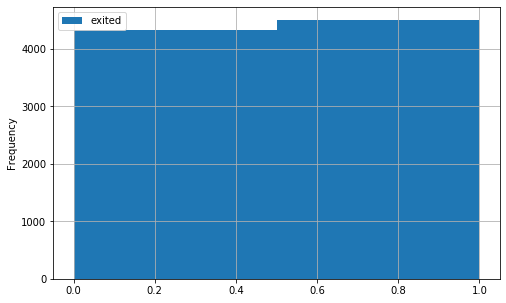

In [29]:
target_upsampled.plot(kind='hist', bins=2, figsize=(8,5), grid=True, legend=True)
plt.show()

Обучаем базовые модели на данных после upsampling-a и снимаем метрики.

In [30]:
models_upsampled_name = postfix(models_name, "_upsampled")
models_upsampled_dict = dict(zip(model_base, models_upsampled_name))
upsampled_result = model_metric(models_upsampled_dict, features_upsampled, target_upsampled, features_valid, target_valid)
upsampled_result

,f1,recall,precision,auc_roc
dt_base_upsampled,0.541353,0.763926,0.419214,0.810545
rf_base_upsampled,0.624460,0.575597,0.682390,0.857367
lr_base_upsampled,0.508167,0.742706,0.386207,0.778162


### Уменьшение выборки с отрицательными целевыми признаками

Исключим из таблицы случайные элементы с отрицательными целевыми признаками, примения функцию sample() с желаемой долей отрицательных признаков (frac) 0,3 от исходной.

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
     
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

Выведем баланс целевого признака после downsampling-a на гистограмме.

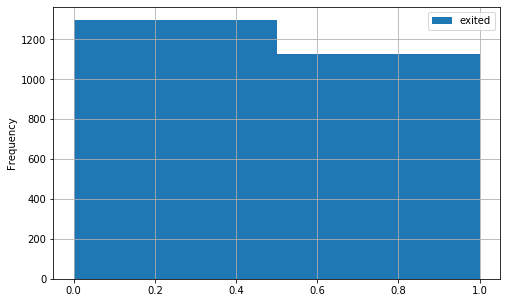

In [32]:
target_downsampled.plot(kind='hist', bins=2, figsize=(8,5), grid=True, legend=True)
plt.show()

Обучаем базовые модели на данных после downsampling-a и снимаем метрики.

In [33]:
models_downsampled_name = postfix(models_name, "_downsampled")
models_downsampled_dict = dict(zip(model_base, models_downsampled_name))
downsampled_result = model_metric(models_downsampled_dict, features_downsampled, target_downsampled, features_valid, target_valid)
downsampled_result

,f1,recall,precision,auc_roc
dt_base_downsampled,0.565302,0.769231,0.446841,0.807169
rf_base_downsampled,0.606765,0.761273,0.504394,0.862710
lr_base_downsampled,0.503553,0.657825,0.407895,0.774808


### Изменение порога

Изменим значение порога присвоения целевого признака в диапазоне от 0 до 0,5 с шагом 0,02 и снимем метрики.

In [34]:
def model_metric_threshold(models_dict, features_train, target_train, features_valid, target_valid, start, stop, step):
    f1_list = []
    recall_list = []
    precision_list = []
    auc_roc_list = []
    threshold_list = []
    for model in models_dict:
        best_f1 = 0.0
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid) 
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        
        for threshold in np.arange(start, stop, step):
            predicted_valid = probabilities_one_valid > threshold
            f1_temp = f1_score(target_valid, predicted_valid)
            
            if f1_temp > best_f1:
                best_f1 = f1_temp
                recall = recall_score(target_valid, predicted_valid)
                precision = precision_score(target_valid, predicted_valid)
                auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
                best_threshold = threshold      
            
        f1_list.append(best_f1)
        recall_list.append(recall)
        precision_list.append(precision)
        auc_roc_list.append(auc_roc)
        threshold_list.append(best_threshold)        
    
    index = ['f1', 'recall', 'precision', 'auc_roc', 'best_threshold']
    columns = list(models_dict.values())
    result_df = pd.DataFrame(
        data = [f1_list, recall_list, precision_list, auc_roc_list, threshold_list], columns = columns, index = index)
    result_df = result_df.T
    return result_df

In [35]:
models_threshold_name = postfix(models_name, "_threshold")
models_threshold_dict = dict(zip(model_base, models_threshold_name))
threshold_result = model_metric_threshold(models_threshold_dict, features_train, target_train, features_valid, target_valid, 0.0, 0.52, 0.02)
threshold_result

,f1,recall,precision,auc_roc,best_threshold
dt_base_threshold,0.622517,0.623342,0.621693,0.834605,0.28
rf_base_threshold,0.640000,0.615385,0.666667,0.861679,0.36
lr_base_threshold,0.506224,0.647215,0.415673,0.773093,0.24


Сведем все полученные метрики в один датафрейм для наглядности.

In [36]:
resul_metric = pd.concat(
    [result_base] + [balanced_result] + [upsampled_result] + [downsampled_result] + [threshold_result.drop(
        ['best_threshold'], axis=1)])
resul_metric

,f1,recall,precision,auc_roc
dt_base,0.576433,0.480106,0.721116,0.834605
rf_base,0.602291,0.488064,0.786325,0.861679
lr_base,0.305221,0.201592,0.628099,0.773093
dt_base_balanced,0.541353,0.763926,0.419214,0.810604
rf_base_balanced,0.575758,0.453581,0.788018,0.858564
lr_base_balanced,0.508349,0.726790,0.390870,0.778129
dt_base_upsampled,0.541353,0.763926,0.419214,0.810545
rf_base_upsampled,0.624460,0.575597,0.682390,0.857367
lr_base_upsampled,0.508167,0.742706,0.386207,0.778162
dt_base_downsampled,0.565302,0.769231,0.446841,0.807169


Отсортируем метрики и выведем топ-3 расчетных условия для каждой метрики.

In [37]:
for column in resul_metric.columns:
    display(resul_metric.sort_values(by = column, ascending = False).head(3))

,f1,recall,precision,auc_roc
rf_base_threshold,0.640000,0.615385,0.666667,0.861679
rf_base_upsampled,0.624460,0.575597,0.682390,0.857367
dt_base_threshold,0.622517,0.623342,0.621693,0.834605


,f1,recall,precision,auc_roc
dt_base_downsampled,0.565302,0.769231,0.446841,0.807169
dt_base_balanced,0.541353,0.763926,0.419214,0.810604
dt_base_upsampled,0.541353,0.763926,0.419214,0.810545


,f1,recall,precision,auc_roc
rf_base_balanced,0.575758,0.453581,0.788018,0.858564
rf_base,0.602291,0.488064,0.786325,0.861679
dt_base,0.576433,0.480106,0.721116,0.834605


,f1,recall,precision,auc_roc
rf_base_downsampled,0.606765,0.761273,0.504394,0.862710
rf_base,0.602291,0.488064,0.786325,0.861679
rf_base_threshold,0.640000,0.615385,0.666667,0.861679


Приоритетной метрикой для определения модели для тестирования примем F1-меру, AUC-ROC мере отдадим меньший приоритет. Судить о модели только по точности и охвату нельзя, эти метрики уже агрегированы в F1-мере, поэтому им отдаем наименьший приоритет. Для дальнейшего тестирования выбираем случайный лес обученный на увеличенной выборке с положительным целевым признаком и случайный лес с порогом (threshold) 0,36.  

Для модели случайного леса подбрем оптимальные гиперпараметры на увеличенной обучайщей выборке по максимальному значению F1-меры.

In [38]:
best_model_rf_upsampled = None
best_f1_rf_upsampled = 0
best_recall_rf_upsampled = 0
best_precision_rf_upsampled = 0
best_auc_roc_rf_upsampled = 0
best_est_rf_upsampled = 0
best_depth_rf_upsampled = 0
for est in range(11, 112, 5):
    for depth in range (11, 32, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid) 
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1 > best_f1_rf_upsampled:
            best_model_rf_upsampled = model
            best_f1_rf_upsampled = f1
            best_recall_rf_upsampled = recall_score(target_valid, predicted_valid)
            best_precision_rf_upsampled = precision_score(target_valid, predicted_valid)
            best_auc_roc_rf_upsampled = roc_auc_score(target_valid, probabilities_one_valid)
            best_est_rf_upsampled = est
            best_depth_rf_upsampled = depth

Максимальная F1-мера на валидационной выборке модели случайного леса с увеличенной обучающей выборкой положительных целевых признаков:

In [39]:
print("F1-мера={:.4f} | Количество деревьев={} | Глубина дерева={}".format(
    best_f1_rf_upsampled, best_est_rf_upsampled, best_depth_rf_upsampled))

F1-мера=0.6308 | Количество деревьев=96 | Глубина дерева=21


### Вывод 

Рассмотрены 4 способа борьбы с дисбалансом целевого признака, для каждой из 3-х базовых моделей. Параметры базовых моделей приняты по наибольшей F1-мере на валидационной выборке после обучения на несбалансированных данных. Все модели имеют метрику AUC-ROC выше 0,77, что существенно превышает значение 0,5 характерное для случайной модели. Максиальный AUC-ROC на валидационной выборке 0,8574-0,8627 у моделей случайного леса.  
Наибольшее значение F1-меры (выше 0,62) демонстрирует модели случайного леса с изменением порога и upsampling-гом, соответственно.   
Наибольшая площать кривой ошибок (AUC-ROC) у моделей случайного леса.  
Наибольшая полнота у модели дерева решений с downsampling-гом.  
Модели линейной регрессии не хводят в топ-3 по рассмотренным метрикам.  

Для тестирования выбираем:
- модель случайного леса обученную для данных с upsampling-гом. Количество деревьев 96, глубина дерева 21. 
- модель случайного леса обученную на дисбалансных данных с порогом (threshold) 0,36. Количество деревьев 81, глубина дерева 23.  

На валидационных выборках F1-мера этих моделей равна 0,631 и 0,640 соответственно.

## Тестирование модели

Протестируем модели случайного леса, полученные при обучении на сбалансированных данных методом upsampling-га. Для базовой модели (best_rf_base) оптимальные гиперпараметры подобраны по несбалансированной выборке, для второй модели (best_rf_upsampled) по сбалансированной.  

In [40]:
test_name = ['best_rf_upsampled']
model_test = [best_model_rf_upsampled]
model_test_dict = dict(zip(model_test, test_name))
upsampling_test_result = model_metric(
    model_test_dict, features_upsampled, target_upsampled, features_test, target_test)
upsampling_test_result

,f1,recall,precision,auc_roc
best_rf_upsampled,0.60303,0.566952,0.644013,0.851172


In [41]:
test_name = ['rf_base_threshold']
model_test = [best_model_rf]
model_test_dict = dict(zip(model_test, test_name))
threshold_test_result = model_metric_threshold(
    model_test_dict, features_train, target_train, features_test, target_test, 0.36, 0.37, 0.02).drop(
    ['best_threshold'], axis=1)
threshold_test_result

,f1,recall,precision,auc_roc
rf_base_threshold,0.606838,0.606838,0.606838,0.850177


### Вывод

Обе модели на тестовой выборке имеют F1-меру меньше чем на валидационной. F1-мера выше 0.59 у обеих моделей.  

## Общий вывод

1) В результате подготовки данных:  

Колонки с категориальными текстовыми признаками "geography", "gender" преобразованы One-Hot Encoding в численные.  
Артефактов в признаках не обнаружено.  
Имеются выбивающиеся часто встречающиеся значения в колонках credit_score и balance. Для признака credit_score можно сказать, что имеется большое число клиентов с максимально возможным кредитным рейтингом. А для признака balance характерно большое число клинтов с нулевым балансом на счете.  
Пропуски в колонке tenure - сколько лет человек является клиентом банка, а именно 9,1% всех данных были удалены, так как, достоверно заполнить пропуски не представляется возможным.  
Произведено масштабирование признаков методом стандартизации данных (StandardScaler).  
Обнаружен дисбаланс целевого признака (колонка "exited" факт ухода клиентов). Положительный целевой признак встречается почти в 4 раза реже отрицательного.  

2) По F1-мере на валидационной выборке определены гиперпараметры базовых моделей:

F1-мера дерева решений 0.5764, при глубине дерева 7.  
F1-мера случайного леса 0.6023, при количестве деревьев 81 и глубине дерева 23.  
F1-мера логистической регрессии 0.3052, при гиперпараметре 'с' равном 0.0800.

3) Для каждой из 3-х базовых моделей рассмотрены 4 способа борьбы с дисбалансом целевого признака:  
- взвешивание классов,
- увеличение выборки с положительным целевым признаком,
- уменьшение выборки с отрицательным целевым признаком,
- изменение порога.
Все модели имеют метрику AUC-ROC выше 0,77, что существенно превышает значение 0,5 характерное для случайной модели. Максиальный AUC-ROC на валидационной выборке 0,8574-0,8627 у моделей случайного леса.
Наибольшее значение F1-меры (выше 0,62) демонстрирует модели случайного леса с изменением порога до 0,36 и upsampling-гом.
Наибольшая площать кривой ошибок (AUC-ROC) у моделей случайного леса.
Модели линейной регрессии не входят в топ-3 по рассмотренным метрикам.
Сильнее всего дисбаланс целевого признака влияет на логистическую регрессию. До борьбы с дисбалансом F1-мера составляла 0,3, после удалось достичь значения 0,5.

Для тестирования выбраны две модели:
- модель случайного леса. Гиперпараметры модели подбраны по F1-мере на обучающей  выборке с upsampling-гом: количество деревьев 96 и глубина дерева 21.
- базовая модель случайного леса с порогом 0,36.

4) На тестовых выборках выборках F1-мера этих моделей равна 0.603 и 0.607 соответственно, а на валционных: 0,631 и 0,640 соответственно.
